<a href="https://colab.research.google.com/github/shkapril/Data-Science-Projects-2024/blob/main/04_week_mission_booster_april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [166]:
# import data
df = pd.read_csv ('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')

In [167]:
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [168]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [169]:
# Check the null value
df.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

In [170]:
#Understand the basic information
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [171]:
#Checking String type variables and understanding their unique values
df.select_dtypes(np.object).apply(lambda n : n.unique())

<ipython-input-171-67c7d60d5337>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.select_dtypes(np.object).apply(lambda n : n.unique())


Star category     [Brown Dwarf, Red Dwarf, White Dwarf, Main Seq...
Star color        [Red, Blue White, White, Yellowish White, Blue...
Spectral Class                                [M, B, A, F, O, K, G]
dtype: object

In [172]:
# number of categories
Star_category = df[['Star category']].value_counts()
Star_color = df[['Star color']].value_counts()
Spectral_class = df[['Spectral Class']].value_counts()
print(Star_category)
print(Star_color)
print(Spectral_class)

Star category
Brown Dwarf      40
Hypergiant       40
Main Sequence    40
Red Dwarf        40
Supergiant       40
White Dwarf      40
dtype: int64
Star color        
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
white                   3
Yellowish White         3
Whitish                 2
yellowish               2
Orange                  2
Blue                    1
White-Yellow            1
Orange-Red              1
Yellowish               1
Blue-White              1
Blue white              1
Pale yellow orange      1
dtype: int64
Spectral Class
M                 111
B                  46
O                  40
A                  19
F                  17
K                   6
G                   1
dtype: int64


In [173]:
#???
#len(set('Spectral Class'))

In [174]:
#len(set('Star color'))

Text(0, 0.5, 'Star category')

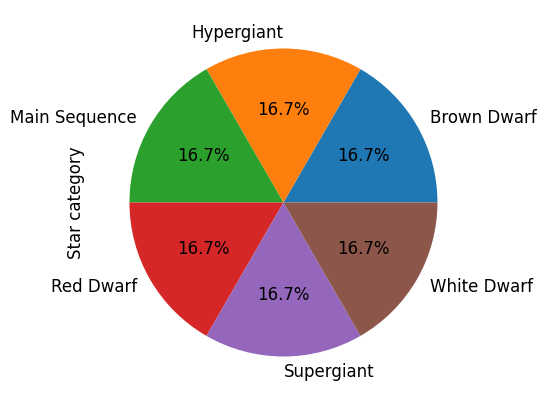

In [175]:
ax = (df['Star category'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Brown Dwarf', 'Hypergiant' , 'Main Sequence', 'Red Dwarf', 'Supergiant', 'White Dwarf'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Star category',fontsize = 12)

In [176]:
df_corr=df_feat.corr()
df_corr

<ipython-input-176-9cef828b22ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df_feat.corr()


,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv)
Temperature (K),1.000000,0.393404,0.064216,-0.420261
Luminosity (L/Lo),0.393404,1.000000,0.526516,-0.692619
Radius (R/Ro),0.064216,0.526516,1.000000,-0.608728
Absolute magnitude (Mv),-0.420261,-0.692619,-0.608728,1.000000


In [177]:
# 마스킹 용도로 변수 지정
half = np.triu(df_feat.corr())
half

<ipython-input-177-270ce17e44da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  half = np.triu(df_feat.corr())


array([[ 1.        ,  0.39340408,  0.06421597, -0.42026054],
       [ 0.        ,  1.        ,  0.52651572, -0.69261923],
       [ 0.        ,  0.        ,  1.        , -0.60872823],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

<Axes: >

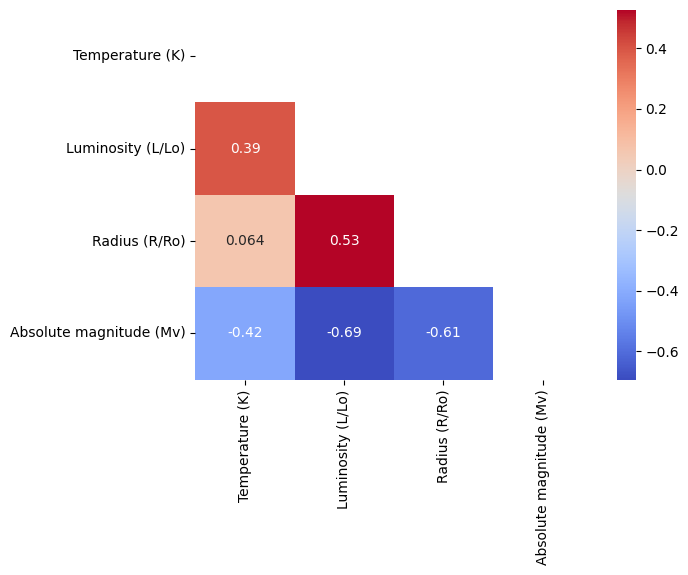

In [178]:
sns.heatmap(df_corr,annot=True,mask=half,cmap='coolwarm')

In [179]:
# 여기에 one-hot-encoding 을 구현해 주세요.

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Star category', 'Star color', 'Spectral Class'])

# Display the DataFrame with one-hot encoded columns
print(df_encoded)

     Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
0               3068           0.002400         0.1700   
1               3042           0.000500         0.1542   
2               2600           0.000300         0.1020   
3               2800           0.000200         0.1600   
4               1939           0.000138         0.1030   
..               ...                ...            ...   
235            38940      374830.000000      1356.0000   
236            30839      834042.000000      1194.0000   
237             8829      537493.000000      1423.0000   
238             9235      404940.000000      1112.0000   
239            37882      294903.000000      1783.0000   

     Absolute magnitude (Mv)  Star type  Star category_Brown Dwarf  \
0                      16.12          0                          1   
1                      16.60          0                          1   
2                      18.70          0                          1   
3                      

In [180]:
df_enco_corr = df_encoded.corr()
df_enco_corr.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category_Brown Dwarf,Star category_Hypergiant,Star category_Main Sequence,Star category_Red Dwarf,Star category_Supergiant,...,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129,-0.351837,0.042610,0.258994,-0.338425,0.227554,...,0.023171,-0.078529,-0.059584,-0.020150,0.463676,-0.057368,-0.024751,-0.100755,-0.704541,0.553433
Luminosity (L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845,-0.267713,0.504658,-0.187621,-0.267713,0.486101,...,-0.067350,-0.111159,-0.054876,-0.093876,-0.078889,-0.165280,0.044004,0.040074,-0.237086,0.557902
Radius (R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975,-0.205417,0.978991,-0.201673,-0.205211,-0.161188,...,-0.051700,-0.084917,-0.041978,-0.057542,-0.033152,-0.126585,0.154147,0.073935,0.066032,0.017883
Absolute magnitude (Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.560843,-0.597246,-0.202100,0.347097,-0.457501,...,0.094530,-0.018174,0.017309,-0.008291,-0.030567,0.111102,-0.088944,-0.062693,0.351736,-0.467128
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.654654,0.654654,0.130931,-0.392792,0.392792,...,-0.032939,0.054366,0.026838,0.058735,0.092975,-0.004755,0.094689,0.109388,-0.447735,0.399339


In [181]:
# 마스킹 용도로 변수 지정
half = np.triu(df_enco_corr.corr())
half

array([[ 1.        ,  0.63160365,  0.20277496, ..., -0.06232199,
        -0.89556729,  0.76282816],
       [ 0.        ,  1.        ,  0.72915098, ...,  0.05672007,
        -0.4279687 ,  0.80452765],
       [ 0.        ,  0.        ,  1.        , ...,  0.11985607,
        -0.04462348,  0.24203884],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.09661448, -0.04901534],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.58259384],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

<Axes: >

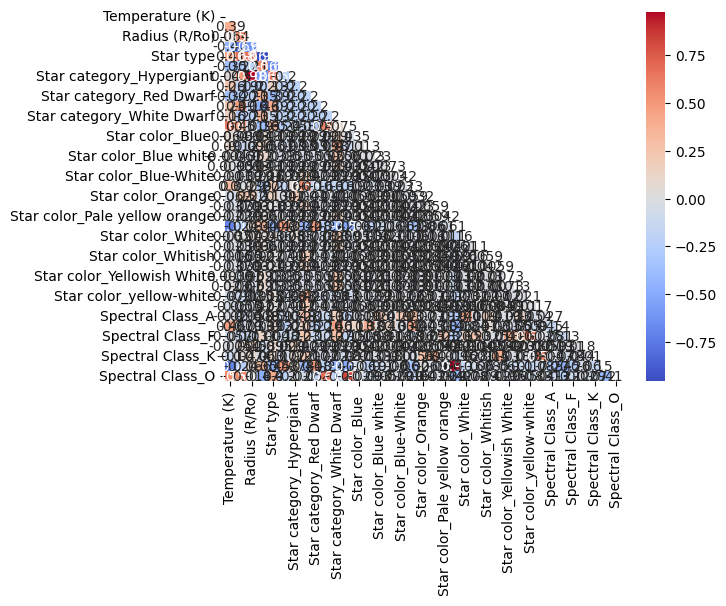

In [182]:
sns.heatmap(df_enco_corr,annot=True,mask=half,cmap='coolwarm')

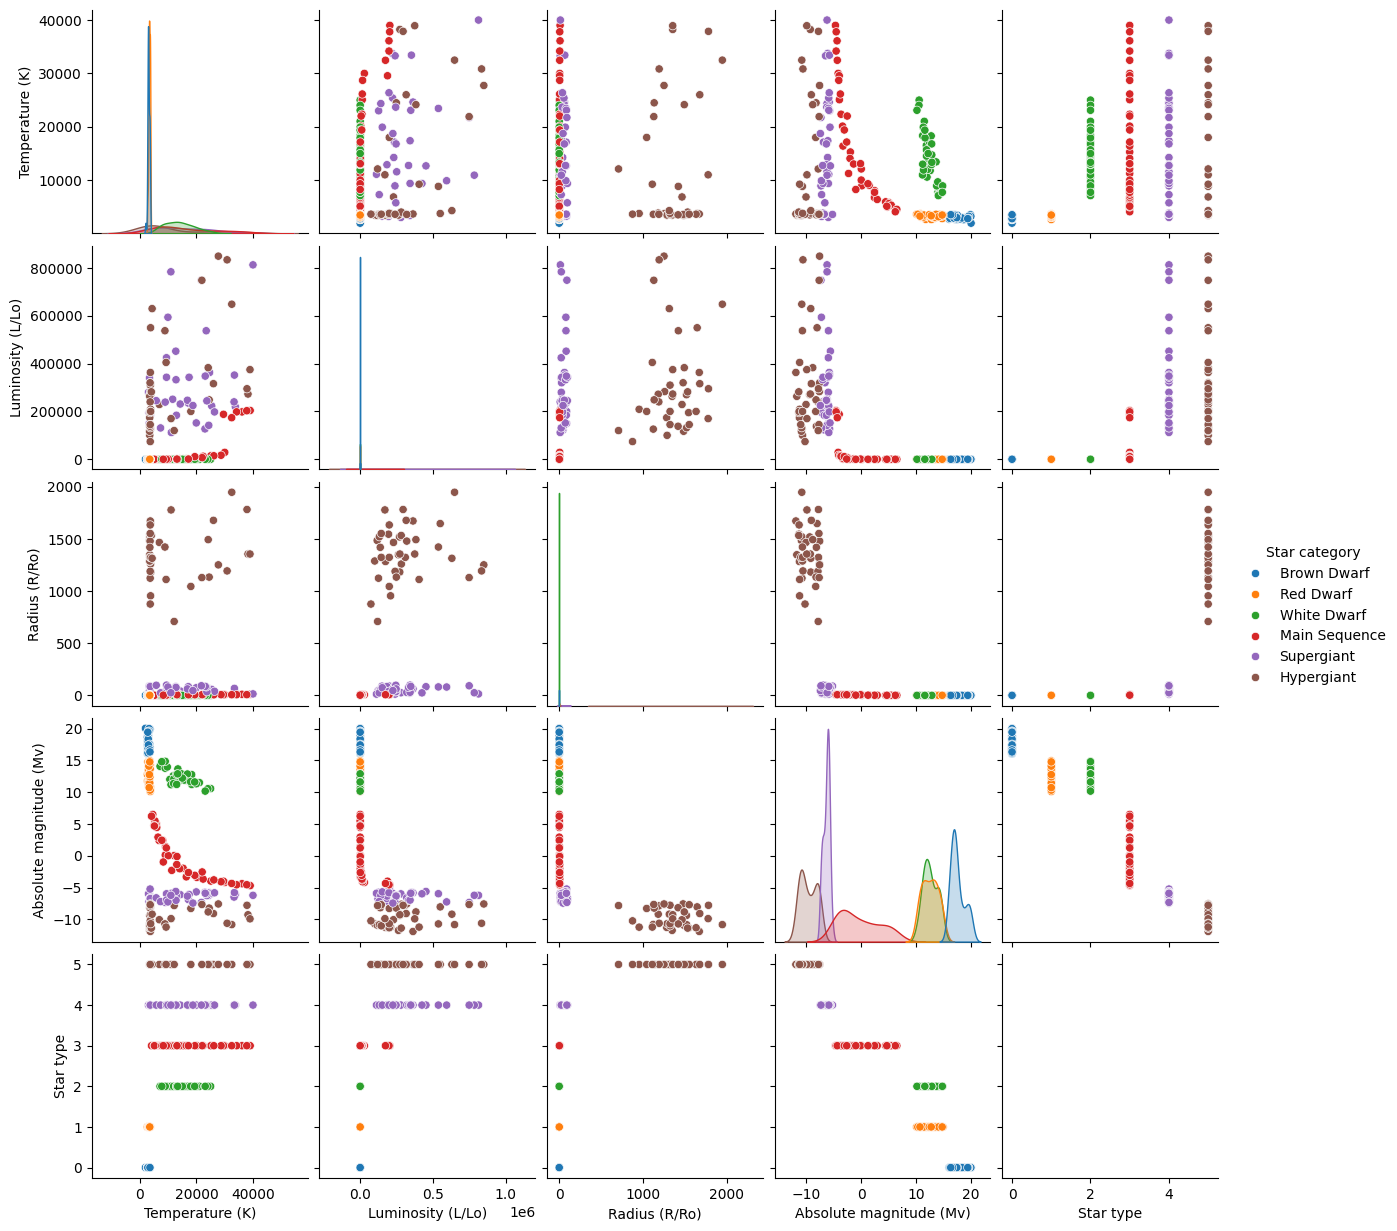

In [183]:
# seaborn 의 pairplot 으로 이탈여부('Star category )에 따라 시각화 해주세요.
sns.pairplot(df, hue='Star category')


# 학습과 예측하기

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [185]:
# define target and features
y = df['Star category']
X = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)']]

In [186]:
# split train and test data using sklearn model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 200)

In [187]:
#set the model
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion="entropy",
                               max_depth=20,
                               max_features=0.9,
                               random_state=42)

In [188]:
# train the model
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=0.9,
                       random_state=42)

In [189]:
# predict the result (y-value) with the Decision Tree Classifier
y_predict1 = model1.predict(X_test)
y_predict1[:20]

array(['Hypergiant', 'Hypergiant', 'White Dwarf', 'Supergiant',
       'Main Sequence', 'Supergiant', 'Brown Dwarf', 'Hypergiant',
       'Hypergiant', 'Brown Dwarf', 'Hypergiant', 'Hypergiant',
       'White Dwarf', 'White Dwarf', 'Red Dwarf', 'Main Sequence',
       'White Dwarf', 'Supergiant', 'Brown Dwarf', 'Supergiant'],
      dtype=object)

In [190]:
# feature_importances_ 를 통해 모델의 피처 중요도를 추출합니다.

model1.feature_importances_

array([0.        , 0.        , 0.51399987, 0.48600013])

# Accuracy 측정하기_Decision Tree

In [191]:
# 빈칸을 채워 정확도(accuracy) 를 구해주세요.
# 정답과 같이 예측한 값은 True 로 나오게 됩니다.
# True == 1 이기 때문에 평균값을 내면 정답을 맞춘 비율을 구할 수 있습니다.

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

97.91666666666666

# 학습&예측해서 정확도 측정하기_Random Forest

In [197]:
# Train and evaluate a random forest model
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test)
acc_rf = accuracy_score(y_test, y_predict2)
print(f'Accuracy of Random Forest: {acc_rf:.3f}')

Accuracy of Random Forest: 0.979


# 학습과 예측하기_Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [198]:
# train model2
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,y_train)
y_predict3 = model3.predict(X_test)
y_predict3[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Hypergiant', 'Hypergiant', 'White Dwarf', 'Supergiant',
       'Main Sequence', 'Supergiant', 'White Dwarf', 'Hypergiant',
       'Hypergiant', 'White Dwarf', 'Hypergiant', 'Hypergiant',
       'White Dwarf', 'White Dwarf', 'White Dwarf', 'White Dwarf',
       'White Dwarf', 'Supergiant', 'White Dwarf', 'Supergiant'],
      dtype=object)

# Accuracy 측정하기_Logistic Regression

In [199]:
accuracy_score(y_test, y_predict3)*100

70.83333333333334

In [196]:
result = smf.ols('Star color_Main Sequence ~ Temperature (K) + Luminosity (L/Lo) + Radius (R/Ro)+
       'Absolute magnitude (Mv), data=df2).fit().summary()
print(result)

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-196-10b6d24f72fd>, line 1)